In [1]:
import pandas as pd
import scipy 
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# visulaize the important characteristics of the dataset
import matplotlib.pyplot as plt


df=pd.read_csv(r"C:\Users\tbuyakar\OneDrive - SecureWorks Inc\Desktop\Hackathon\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
print(df.shape)
print(df[' Label'].unique())
#data=data.drop(['Flow Bytes/s',' Flow Packets/s'],axis=1)
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
print("Dropping the columns of ")
print(cols_to_drop)
#df = df.drop(cols_to_drop, axis=1)
#df = df.drop(['Flow Bytes/s', ' Flow Packets/s'],axis=1)

C:\Program Files (x86)\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(225745, 79)
['BENIGN' 'DDoS']
Dropping the columns of 
Index([' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' CWE Flag Count',
       'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate',
       ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')


In [2]:
print(df.shape)

(225745, 79)


In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
data_=np.asarray(df)
length=len(data_[0])
X=data_[:,0:length-1]
Labels=data_[:,-1]
le = preprocessing.LabelEncoder()
Y=le.fit_transform(Labels)

X[X == 'Infinity'] = np.nan
X[X=='NaN'] = np.nan
imputer = Imputer(missing_values=np.nan,strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

#print Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
print(np.shape(X))
print(np.shape(Y))

(225745, 78)
(225745,)


In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=6,max_features=60)
clf.fit(X_train,y_train)

#Predict Output
predicted= clf.predict(X_test)
predict_train=clf.predict(X_train)

In [5]:
from sklearn.metrics import classification_report
print(predicted)
print(y_test)
print(classification_report(y_test, predicted))
print(classification_report(y_train, predict_train))

[1 0 0 ... 1 1 1]
[1 0 0 ... 1 1 1]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     29262
          1       1.00      1.00      1.00     38462

avg / total       1.00      1.00      1.00     67724

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     68456
          1       1.00      1.00      1.00     89565

avg / total       1.00      1.00      1.00    158021



In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

accuracy_score(y_train, predict_train)

0.999987343454351

C:\Program Files (x86)\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dropping the columns of 
Index([' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' CWE Flag Count',
       'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate',
       ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags'

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Printing X
[[5.4865e+04 3.0000e+00 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [5.5054e+04 1.0900e+02 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [5.5055e+04 5.2000e+01 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [6.1375e+04 7.5000e+01 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.1323e+04 4.8000e+01 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.1326e+04 6.8000e+01 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


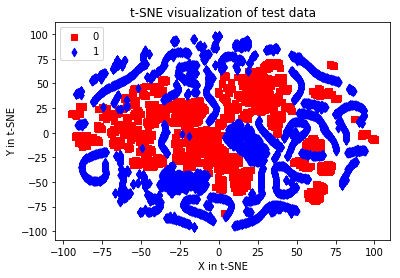

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# visulaize the important characteristics of the dataset
import matplotlib.pyplot as plt


# step 1: download the data
dataframe_all = pd.read_csv(r"C:\Users\tbuyakar\OneDrive - SecureWorks Inc\Desktop\Hackathon\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
num_rows = dataframe_all.shape[0]

# step 2: remove useless data
# count the number of missing elements (NaN) in each column
counter_nan = dataframe_all.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]
# remove the columns with missing elements
#dataframe_all = dataframe_all[counter_without_nan.keys()]
# remove the first 7 columns which contain no discriminative information
#dataframe_all = dataframe_all.ix[:,7:]
nunique = dataframe_all.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
print("Dropping the columns of ")
print(cols_to_drop)
# the list of columns (the last column is the class label)
columns = dataframe_all.columns
dataframe_all = dataframe_all.drop(cols_to_drop, axis=1)
dataframe_all = dataframe_all.drop(['Flow Bytes/s', ' Flow Packets/s'],axis=1)
print(columns)




#df = df[np.isfinite(df['EPS'])]
dataframe_all.replace([np.inf, -np.inf], np.nan)
dataframe_all.dropna()
#dataframe_all = dataframe_all.drop(['Flow Bytes/s', ' Flow Packets/s'],axis=1)
#imputer = Imputer(missing_values=np.nan,strategy = 'mean')
#imputer = imputer.fit(x)
#x = imputer.transform(x)

# step 3: get features (x) and scale the features
# get x and convert it to numpy array


x = dataframe_all.ix[:,:-1].values
print("Printing X")
print(x)
standard_scaler = StandardScaler()

x_std = standard_scaler.fit_transform(x)



# step 4: get class labels y and then encode it into number 
# get class label data
y = dataframe_all.ix[:,-1].values
# encode the class label
class_labels = np.unique(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# step 5: split the data into training set and test set
test_percentage = 0.1
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = test_percentage, random_state = 0)

# t-distributed Stochastic Neighbor Embedding (t-SNE) visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test)

# scatter plot the sample points among 5 classes
markers=('s', 'd', 'o', '^', 'v')
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan'}
plt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()
